<a href="https://colab.research.google.com/github/pedrogasg/models-katas/blob/master/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
unique, counts = np.unique(y_train, return_counts=True)
print('Train labels: ', dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [0]:
unique, counts = np.unique(y_test, return_counts=True)
print('Test labels: ', dict(zip(unique, counts)))

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [0]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

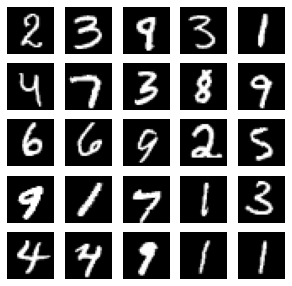

In [0]:
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  plt.subplot(5, 5, i + 1)
  image = images[i]
  plt.imshow(image, cmap='gray')
  plt.axis('off')

plt.show()

In [0]:
num_labels = len(np.unique(y_train))

In [0]:
from keras.utils import to_categorical, plot_model
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
image_shape = x_train.shape

In [0]:
from keras.models import Model
from keras.layers import Activation, Dense, Dropout, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [0]:
x_train = np.reshape(x_train,[-1, image_shape[1], image_shape[2], 1])
x_test = np.reshape(x_test,[-1, image_shape[1], image_shape[2], 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
input_shape = (image_shape[1], image_shape[2], 1)
batch_size = 128
kernel_size = 3
filters = 64
dropout = 0.3

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0   

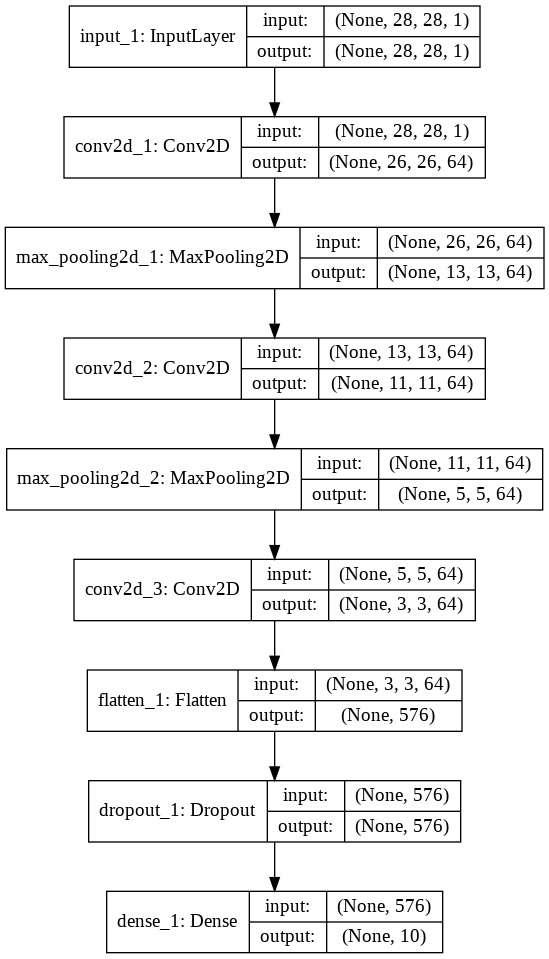

In [0]:
inputs = Input(shape=input_shape)
x = inputs
x = Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu',
        input_shape=input_shape)(x)
x = MaxPooling2D()(x)
x = Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu')(x)
x = Flatten()(x)
x = Dropout(dropout)(x)
outputs = Dense(num_labels, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
model.summary()
plot_model(model, show_shapes=True)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.2837 - accuracy: 0.9129
Epoch 2/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0706 - accuracy: 0.9783
Epoch 3/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0515 - accuracy: 0.9843
Epoch 4/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0417 - accuracy: 0.9865
Epoch 5/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0360 - accuracy: 0.9887
Epoch 6/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0306 - accuracy: 0.9903
Epoch 7/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0267 - accuracy: 0.9914
Epoch 8/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0249 - accuracy: 0.9919
Epoch 9/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0220 - accuracy: 0.9928
Epoch 10/20
60000/60000 [====================

In [0]:
ev, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

10000/10000 [==============================] - 1s 60us/step


In [0]:
print("\n Test accuracy: %.2f%%" % (100.0 * acc))


 Test accuracy: 99.26%


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN

In [0]:
input_shape = (image_shape[1], image_shape[2])
batch_size = 128
units = 256
dropout = 0.2

In [0]:
x_train = np.reshape(x_train,[-1, image_shape[1], image_shape[2]])
x_test = np.reshape(x_test,[-1, image_shape[1], image_shape[2]])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 256)               72960     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


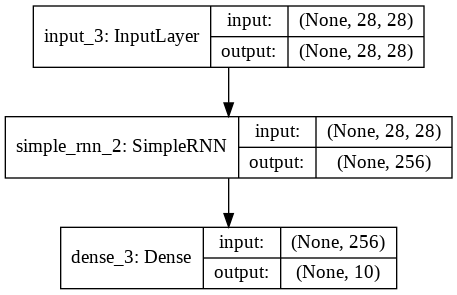

In [0]:
inputs = Input(shape=input_shape)
x = inputs
x = SimpleRNN(units=units, dropout=dropout, input_shape=input_shape)(x)
outputs = Dense(num_labels, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
model.summary()
plot_model(model, show_shapes=True)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/100
60000/60000 [==============================] - 14s 241us/step - loss: 0.7848 - accuracy: 0.7709
Epoch 2/100
60000/60000 [==============================] - 14s 234us/step - loss: 0.3581 - accuracy: 0.8952
Epoch 3/100
60000/60000 [==============================] - 14s 235us/step - loss: 0.2673 - accuracy: 0.9198
Epoch 4/100
60000/60000 [==============================] - 14s 233us/step - loss: 0.2241 - accuracy: 0.9325
Epoch 5/100
60000/60000 [==============================] - 14s 231us/step - loss: 0.1986 - accuracy: 0.9405
Epoch 6/100
60000/60000 [==============================] - 14s 230us/step - loss: 0.1795 - accuracy: 0.9452
Epoch 7/100
60000/60000 [==============================] - 14s 230us/step - loss: 0.1602 - accuracy: 0.9517
Epoch 8/100
60000/60000 [==============================] - 14s 230us/step - loss: 0.1519 - accuracy: 0.9543
Epoch 9/100
60000/60000 [==============================] - 14s 231us/step - loss: 0.1456 - accuracy: 0.9553
Epoch 10/100
60000/60000 [==

KeyboardInterrupt: ignored

In [0]:
ev, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

10000/10000 [==============================] - 1s 59us/step


In [0]:
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 97.9%


In [0]:
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, concatenate

In [0]:
x_train = np.reshape(x_train,[-1, image_shape[1], image_shape[2], 1])
x_test = np.reshape(x_test,[-1,  image_shape[1], image_shape[2], 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
input_shape = (image_shape[1], image_shape[2], 1)
batch_size = 32
kernel_size = 3
dropout = 0.4
n_filters = [32, 64, 128]

In [0]:
def convolutions(x, filters, dilation_rate=1):
  for filter in filters:
    x = Conv2D(filters=filter,
               kernel_size=kernel_size,
               padding='same',
               activation='relu',
               dilation_rate=dilation_rate)(x)
    x = Dropout(dropout)(x)
    x = MaxPooling2D()(x)
  return x

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 28, 28, 32)   320         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 28, 28, 32)   320         input_7[0][0]                    
____________________________________________________________________________________________

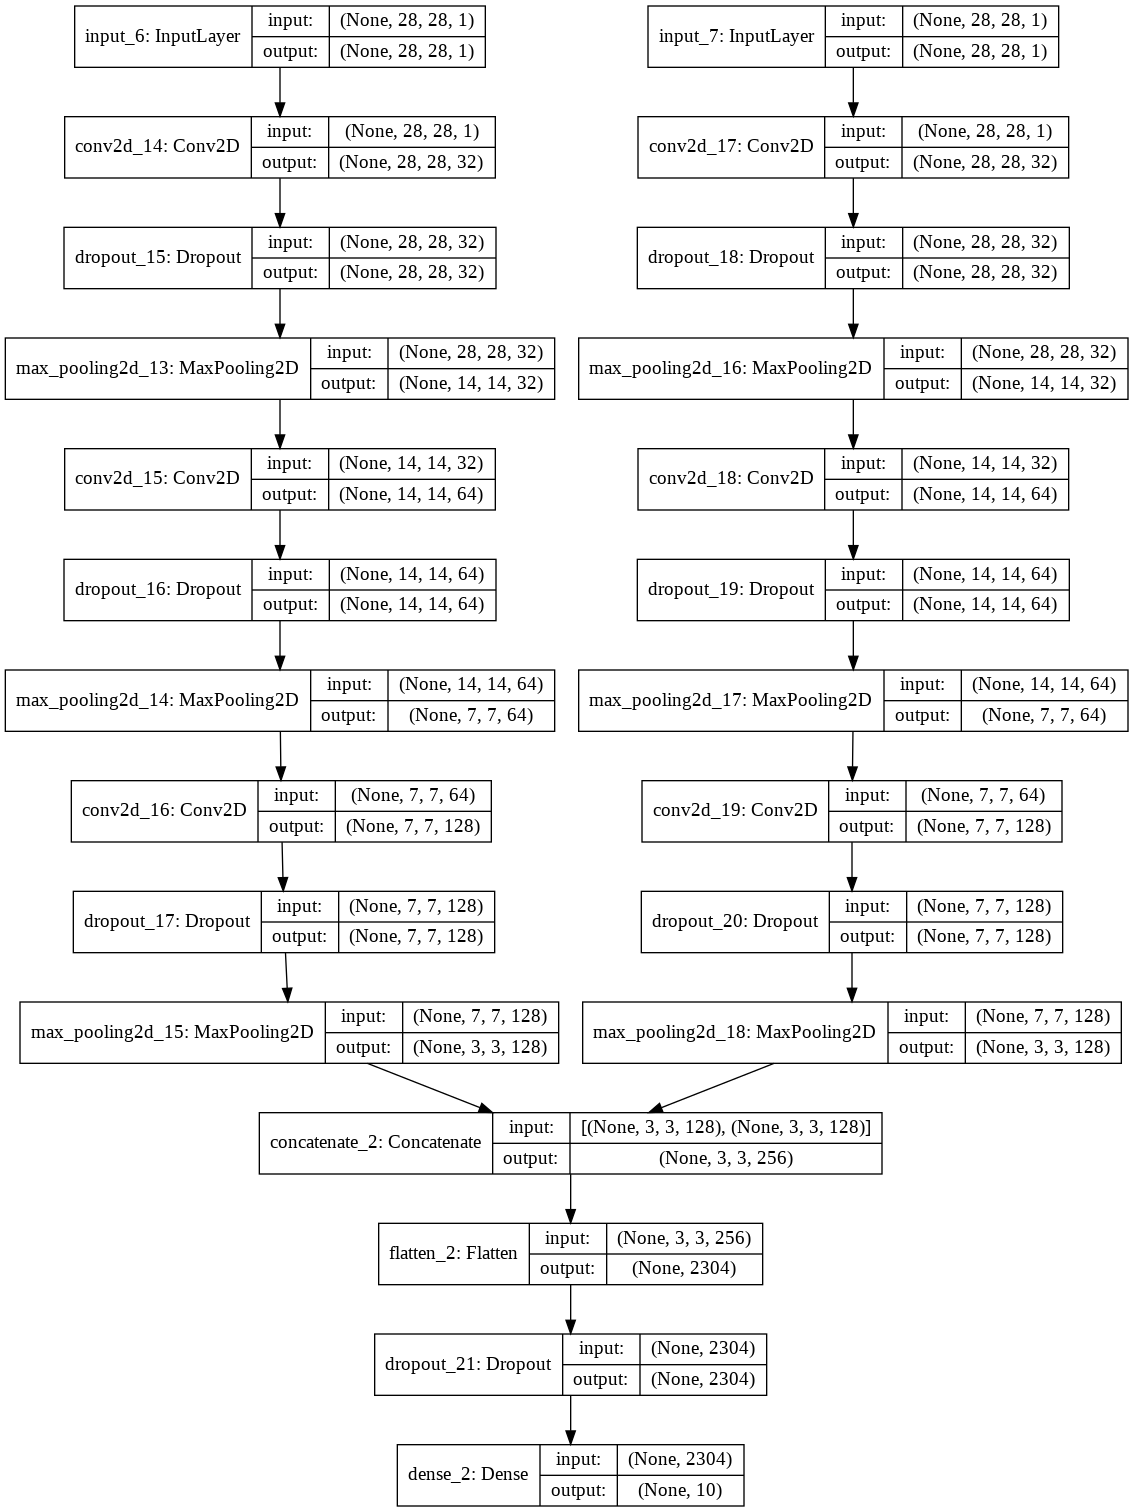

In [0]:
left_inputs = Input(shape=input_shape)
x1 = convolutions(left_inputs, n_filters)

right_inputs = Input(shape=input_shape)
x2 = convolutions(right_inputs, n_filters, 2)

x = concatenate([x1, x2])
x = Flatten()(x)
x = Dropout(dropout)(x)
outputs = Dense(num_labels, activation='softmax')(x)
model = Model([left_inputs, right_inputs], outputs)
model.summary()
plot_model(model, show_shapes=True)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model.fit([x_train, x_train],
          y_train,
          epochs=20,
          batch_size=batch_size)

Epoch 1/20
60000/60000 [==============================] - 20s 331us/step - loss: 0.1776 - accuracy: 0.9445
Epoch 2/20
60000/60000 [==============================] - 13s 223us/step - loss: 0.0663 - accuracy: 0.9796
Epoch 3/20
60000/60000 [==============================] - 13s 221us/step - loss: 0.0538 - accuracy: 0.9832
Epoch 4/20
60000/60000 [==============================] - 13s 221us/step - loss: 0.0477 - accuracy: 0.9849
Epoch 5/20
60000/60000 [==============================] - 13s 221us/step - loss: 0.0431 - accuracy: 0.9865
Epoch 6/20
60000/60000 [==============================] - 13s 221us/step - loss: 0.0394 - accuracy: 0.9870
Epoch 7/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.0382 - accuracy: 0.9881
Epoch 8/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.0373 - accuracy: 0.9879
Epoch 9/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.0354 - accuracy: 0.9893
Epoch 10/20
60000/60000 [============

In [0]:
score = model.evaluate([x_test, x_test],
                       y_test,
                       batch_size=batch_size,
                       verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 99.3%
